# DS-GA 1001 Intro to Data Science Capstone Project
## Jialing Li (jl9716), Erqian Wang (ew1708), Kristine Zeng (yz4792), Qiwenjing Jiang (qj336)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import seaborn as sns
import random

random.seed(10636408)

In [ ]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Load and Examine the Hotel Booking Dataset

In [ ]:
df = pd.read_csv('hotel_booking.csv')
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.shape

(119390, 36)

### Data Preprocessing

#### Check Duplicates

In [ ]:
df[df.duplicated()] # no duplicated values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


#### Drop/Fill Missing Values

In [ ]:
# drop name, email, phone number, credit card number columns (not needed for our analysis)
df.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace = True)
# missing value percentage of each column
na_percentage = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['missing value percentage']).sort_values(by='missing value percentage', ascending=False)
na_percentage

,missing value percentage
company,94.306893
agent,13.686238
country,0.408744
children,0.003350
reserved_room_type,0.000000
assigned_room_type,0.000000
booking_changes,0.000000
deposit_type,0.000000
hotel,0.000000
previous_cancellations,0.000000


In [ ]:
booking = df.copy()
# since this is a large dataset and only 0.00335% rows are lack of number of children, we drop these rows
booking = booking.dropna(subset = ['children'])

# 'country' and 'agent' are categorical, which will be converted using one-hot encoding, so fill NA with 'unknown'
booking['country'].fillna('unknown', inplace = True)
booking['agent'].fillna('unknown', inplace = True)

# 'company': ID of the company/entity that made the booking or responsible for paying the booking.
#            ID is presented instead of designation for anonymity reasons
# mostly missing (94.306893%) and relatively insignificant, so drop the whole column
booking.drop(['company'], axis = 1, inplace = True)

In [ ]:
# check updating result
# booking.isna().sum().sum() # no missing values
pd.DataFrame(booking.isnull().sum()/booking.shape[0]*100, columns = ['missing value percentage'])

,missing value percentage
hotel,0.0
is_canceled,0.0
lead_time,0.0
arrival_date_year,0.0
arrival_date_month,0.0
arrival_date_week_number,0.0
arrival_date_day_of_month,0.0
stays_in_weekend_nights,0.0
stays_in_week_nights,0.0
adults,0.0


#### Distinguish Categorial and Binary Categorial Columns

In [ ]:
def report_df_features(df):
    overview = pd.DataFrame(df.dtypes, columns = ['dtype'])
    overview['uniqueValues'] = df.nunique()
    return overview

In [ ]:
report_df_features(booking)

,dtype,uniqueValues
hotel,object,2
is_canceled,int64,2
lead_time,int64,479
arrival_date_year,int64,3
arrival_date_month,object,12
arrival_date_week_number,int64,53
arrival_date_day_of_month,int64,31
stays_in_weekend_nights,int64,17
stays_in_week_nights,int64,35
adults,int64,14


#### Dataset Values Conversion

**Only two hotels - City Hotel and Resort Hotel. Convert the column to 0 and 1.**

**Convert month 'arrival_date_month' from string to number.**

In [ ]:
# City Hotel = 0, Resort Hotel = 1
booking['hotel'] = (booking['hotel'] == 'Resort Hotel')*1
# convert months
month = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
         'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
booking['arrival_date_month'].replace(month, inplace = True)
booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,unknown,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,unknown,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,1,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,unknown,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,1,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,1,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,8,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,0,0,102,2017,8,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,0,0,34,2017,8,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,0,0,109,2017,8,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# 'children' column is float, check for actual values and see if unreasonable values exist
booking['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [ ]:
# the values are indeed all integers, so convert them to integer form
booking['children'] = booking['children'].astype("int64")
report_df_features(booking)

,dtype,uniqueValues
hotel,int64,2
is_canceled,int64,2
lead_time,int64,479
arrival_date_year,int64,3
arrival_date_month,int64,12
arrival_date_week_number,int64,53
arrival_date_day_of_month,int64,31
stays_in_weekend_nights,int64,17
stays_in_week_nights,int64,35
adults,int64,14


In [ ]:
# total nights stayed
booking['total_nights'] = booking['stays_in_weekend_nights'] + booking['stays_in_week_nights']
# total people
booking['total_people'] = booking['adults'] + booking['children'] + booking['babies']

# observe rows with total nights stayed being 0
booking[(booking['total_nights'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_people
0,1,0,342,2015,7,27,1,0,0,2,...,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,1,0,737,2015,7,27,1,0,0,2,...,unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
167,1,0,111,2015,7,28,6,0,0,2,...,240.0,0,Transient,0.0,0,2,Check-Out,2015-07-06,0,2
168,1,0,0,2015,7,28,6,0,0,1,...,250.0,0,Transient,0.0,0,0,Check-Out,2015-07-06,0,1
196,1,0,8,2015,7,28,7,0,0,2,...,unknown,0,Transient,0.0,0,1,Check-Out,2015-07-07,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,0,0,15,2017,7,27,6,0,0,1,...,14.0,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,0,1
117701,0,0,0,2017,8,32,8,0,0,2,...,262.0,0,Transient,0.0,0,0,Check-Out,2017-08-08,0,2
118029,0,0,0,2017,8,33,14,0,0,2,...,unknown,0,Transient,0.0,0,0,Check-Out,2017-08-14,0,2
118631,0,0,78,2017,8,34,23,0,0,1,...,98.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,0,1


In [ ]:
# check for rows with total people being 0
booking[(booking['total_people'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_people
2224,1,0,1,2015,10,41,6,0,3,0,...,unknown,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,3,0
2409,1,0,0,2015,10,42,12,0,0,0,...,unknown,0,Transient,0.00,0,0,Check-Out,2015-10-12,0,0
3181,1,0,36,2015,11,47,20,1,2,0,...,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,3,0
3684,1,0,165,2015,12,53,30,1,4,0,...,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,5,0
3708,1,0,165,2015,12,53,30,2,4,0,...,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,0,0,107,2017,6,26,27,0,3,0,...,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30,3,0
115091,0,0,1,2017,6,26,30,0,1,0,...,unknown,0,Transient,0.00,1,1,Check-Out,2017-07-01,1,0
116251,0,0,44,2017,7,28,15,1,1,0,...,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17,2,0
116534,0,0,2,2017,7,28,15,2,5,0,...,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,7,0


**Unless the booking is canceled or no-show (according to 'reservation_status' column), drop the rows with total nights stayed being 0 or total people being 0.**

In [ ]:
booking = booking[~((booking['total_nights'] == 0) & (booking['reservation_status'] == 'Check-Out'))]
booking = booking[~((booking['total_people'] == 0) & (booking['reservation_status'] == 'Check-Out'))]

In [ ]:
booking[(booking['total_nights'] == 0) & (booking['reservation_status'] == 'Check-Out')] # update completed

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_people


In [ ]:
booking[(booking['total_people'] == 0) & (booking['reservation_status'] == 'Check-Out')] # update completed

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_people


In [ ]:
report_df_features(booking)

,dtype,uniqueValues
hotel,int64,2
is_canceled,int64,2
lead_time,int64,478
arrival_date_year,int64,3
arrival_date_month,int64,12
arrival_date_week_number,int64,53
arrival_date_day_of_month,int64,31
stays_in_weekend_nights,int64,17
stays_in_week_nights,int64,33
adults,int64,14


**Examine Average Daily Rate 'adr'**

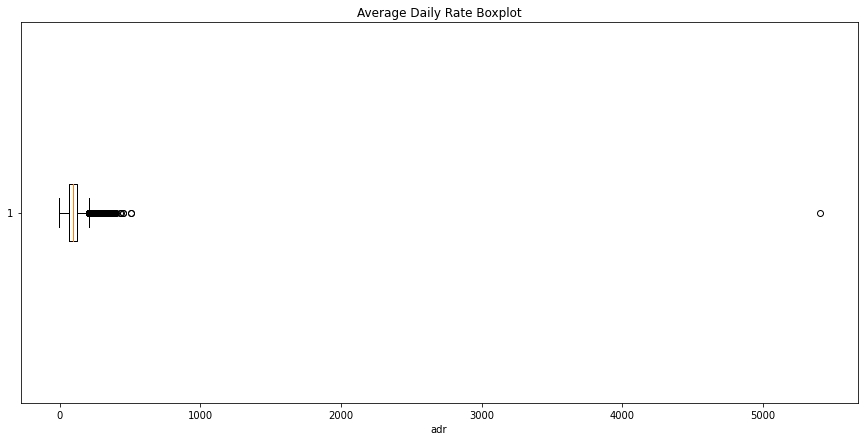

In [ ]:
plt.figure(figsize=(15,7))
plt.boxplot(booking['adr'], vert = False);
plt.title('Average Daily Rate Boxplot');
plt.xlabel('adr');

**Remove outliers and negative values**

In [ ]:
# statistics of average daily rate
adr_stat = booking['adr'].describe()
adr_stat

count    118609.000000
mean        102.484777
std          50.036734
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
# remove outliers of rainfall values in current location, drop the row
q1 = adr_stat['25%']
q3 = adr_stat['75%']
adr_iqr = q3 - q1
lower = q1 - 1.5*adr_iqr
upper = q3 + 1.5*adr_iqr
booking = booking[(booking['adr'] >= lower) & (booking['adr'] <= upper)]
booking = booking[booking['adr'] > 0]

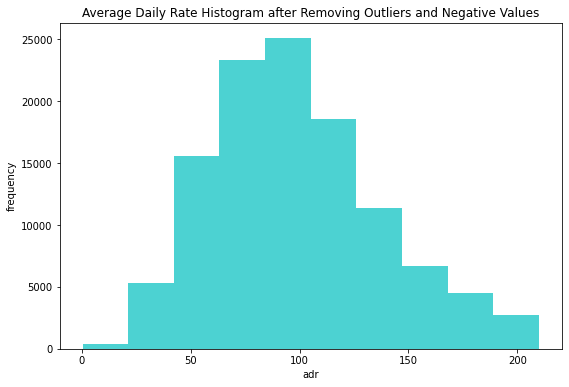

In [ ]:
plt.figure(figsize=(9,6))
plt.hist(booking['adr'], color = 'c', alpha = 0.7)
plt.title('Average Daily Rate Histogram after Removing Outliers and Negative Values');
plt.xlabel('adr');
plt.ylabel('frequency');

In [ ]:
# data for regression ###
booking_reg = booking.copy()

**One-hot encode categorial features**

In [ ]:
report = report_df_features(booking)
report

,dtype,uniqueValues
hotel,int64,2
is_canceled,int64,2
lead_time,int64,478
arrival_date_year,int64,3
arrival_date_month,int64,12
arrival_date_week_number,int64,53
arrival_date_day_of_month,int64,31
stays_in_weekend_nights,int64,16
stays_in_week_nights,int64,31
adults,int64,5


In [ ]:
categorial_columns = list(report[report['dtype'] == 'object'].index)
# exclude reservation_status_date
categorial_columns.remove('reservation_status_date')
# get dummies
encoded_booking = pd.get_dummies(booking, columns = categorial_columns)

In [ ]:
# final dataset without dummies (categories in string)
booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_people
2,1,0,7,2015,7,27,1,0,1,1,...,unknown,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,1,0,13,2015,7,27,1,0,1,1,...,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,1,0,14,2015,7,27,1,0,2,2,...,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
5,1,0,14,2015,7,27,1,0,2,2,...,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
6,1,0,0,2015,7,27,1,0,2,2,...,unknown,0,Transient,107.00,0,0,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,0,21,2017,8,35,30,2,5,2,...,394.0,0,Transient,96.14,0,2,Check-Out,2017-09-06,7,2
119385,0,0,23,2017,8,35,30,2,5,2,...,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119387,0,0,34,2017,8,35,31,2,5,2,...,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,0,0,109,2017,8,35,31,2,5,2,...,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


In [ ]:
# final dataset with dummies
encoded_booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent_531.0,agent_535.0,agent_unknown,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
2,1,0,7,2015,7,27,1,0,1,1,...,0,0,1,0,0,1,0,0,1,0
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,0,1,0,0,1,0
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,0,1,0,0,1,0
5,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,0,1,0,0,1,0
6,1,0,0,2015,7,27,1,0,2,2,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,0,21,2017,8,35,30,2,5,2,...,0,0,0,0,0,1,0,0,1,0
119385,0,0,23,2017,8,35,30,2,5,2,...,0,0,0,0,0,1,0,0,1,0
119387,0,0,34,2017,8,35,31,2,5,2,...,0,0,0,0,0,1,0,0,1,0
119388,0,0,109,2017,8,35,31,2,5,2,...,0,0,0,0,0,1,0,0,1,0


------

### Additional Data Observation

In [ ]:
rp = report_df_features(booking)
numeric_columns = list(rp[rp['dtype'] != 'object'].index)
numeric_columns = list(set(numeric_columns)
                       - set(['arrival_date_year', 'arrival_date_month',
                              'arrival_date_week_number', 'arrival_date_day_of_month']))
numeric_columns

['previous_bookings_not_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'days_in_waiting_list',
 'booking_changes',
 'babies',
 'stays_in_week_nights',
 'required_car_parking_spaces',
 'total_people',
 'total_nights',
 'total_of_special_requests',
 'is_canceled',
 'adults',
 'previous_cancellations',
 'hotel',
 'is_repeated_guest',
 'adr',
 'children']

In [ ]:
# pairwise correlation between numeric features
pw_corr = booking[numeric_columns].corr()
pw_corr

,previous_bookings_not_canceled,lead_time,stays_in_weekend_nights,days_in_waiting_list,booking_changes,babies,stays_in_week_nights,required_car_parking_spaces,total_people,total_nights,total_of_special_requests,is_canceled,adults,previous_cancellations,hotel,is_repeated_guest,adr,children
previous_bookings_not_canceled,1.000000,-0.070952,-0.038933,-0.009024,0.012587,-0.006459,-0.046127,0.052051,-0.112198,-0.049818,0.024891,-0.055382,-0.127815,0.147181,0.011768,0.417716,-0.069510,-0.018390
lead_time,-0.070952,1.000000,0.076618,0.170076,0.001426,-0.019288,0.160621,-0.118701,0.082548,0.150265,-0.094713,0.294034,0.132823,0.087260,-0.076213,-0.113117,-0.073463,-0.032937
stays_in_weekend_nights,-0.038933,0.076618,1.000000,-0.055470,0.042581,0.020161,0.485620,-0.023209,0.110962,0.756800,0.075504,-0.011167,0.105997,-0.011944,0.186999,-0.075764,0.018685,0.042335
days_in_waiting_list,-0.009024,0.170076,-0.055470,1.000000,-0.011634,-0.010321,-0.002697,-0.030135,-0.024098,-0.023854,-0.083426,0.055637,-0.006323,0.005697,-0.072698,-0.021035,-0.042443,-0.030391
booking_changes,0.012587,0.001426,0.042581,-0.011634,1.000000,0.084006,0.072837,0.062350,0.000340,0.071226,0.050730,-0.143789,-0.054268,-0.027133,0.071688,0.012575,0.019205,0.051956
babies,-0.006459,-0.019288,0.020161,-0.010321,0.084006,1.000000,0.020977,0.034025,0.186492,0.023622,0.092774,-0.030830,0.021326,-0.007259,0.044136,-0.008857,0.024681,0.023536
stays_in_week_nights,-0.046127,0.160621,0.485620,-0.002697,0.072837,0.020977,1.000000,-0.030394,0.109591,0.938916,0.069018,0.015244,0.106705,-0.013291,0.235378,-0.081222,0.023840,0.038766
required_car_parking_spaces,0.052051,-0.118701,-0.023209,-0.030135,0.062350,0.034025,-0.030394,1.000000,0.038180,-0.031864,0.075279,-0.192183,0.009018,-0.017928,0.218264,0.086230,0.028011,0.044729
total_people,-0.112198,0.082548,0.110962,-0.024098,0.000340,0.186492,0.109591,0.038180,1.000000,0.125629,0.183521,0.041740,0.799756,-0.017710,0.016992,-0.151069,0.361477,0.592644
total_nights,-0.049818,0.150265,0.756800,-0.023854,0.071226,0.023622,0.938916,-0.031864,0.125629,1.000000,0.081332,0.007002,0.121516,-0.014641,0.249619,-0.090559,0.025182,0.045653


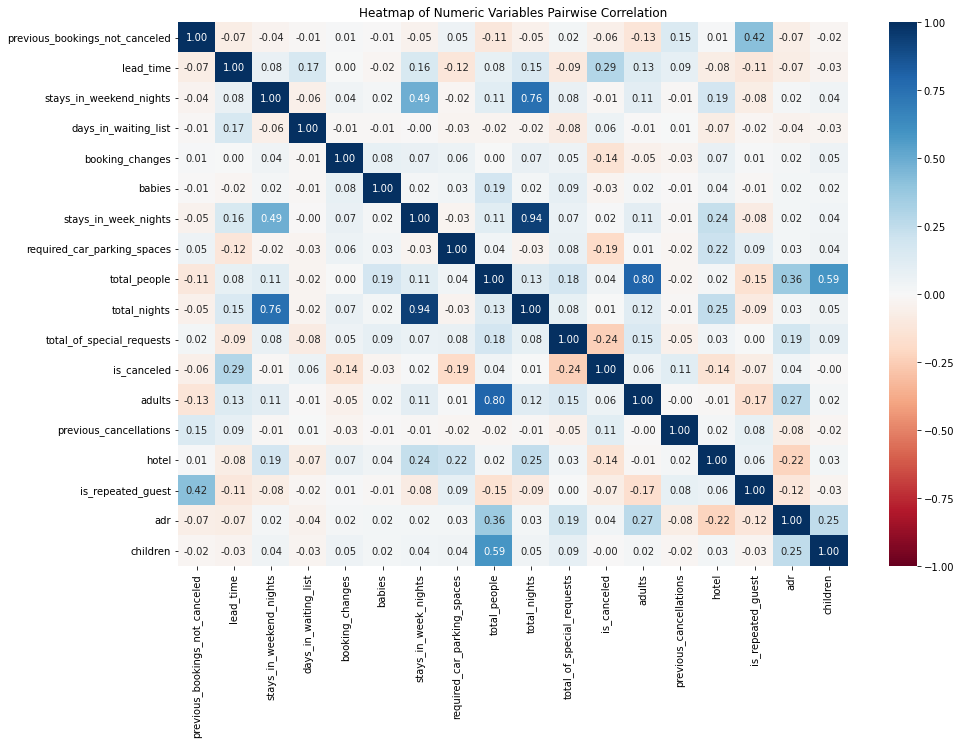

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(pw_corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='RdBu');
plt.title('Heatmap of Numeric Variables Pairwise Correlation');

-----------

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

def train_test_spl(df):
  # use adults as y for train test split
  x = df.drop('adults', axis = 1)
  y = df['adults']

  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 10636408)

  # since the target for different questions will be different, put the y value (adults) back
  train = x_train.copy()
  test = x_test.copy()
  train['adults'] = y_train
  test['adults'] = y_test

  return train, test

In [ ]:
train, test = train_test_spl(encoded_booking)

In [ ]:
train

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,children,...,agent_535.0,agent_unknown,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,adults
45867,0,0,98,2015,11,48,23,1,3,0,...,0,0,0,0,0,1,0,1,0,1
26107,1,0,132,2016,7,30,18,1,3,0,...,0,0,0,0,0,1,0,1,0,2
95680,0,0,0,2016,8,34,20,1,1,0,...,0,0,0,0,1,0,0,1,0,2
80124,0,1,72,2015,12,53,27,2,0,0,...,0,0,0,0,1,0,1,0,0,2
66313,0,1,62,2017,4,16,16,2,3,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,1,1,64,2016,11,45,4,0,2,0,...,0,0,0,0,1,0,1,0,0,2
100441,0,0,8,2016,10,44,27,0,1,0,...,0,0,0,0,1,0,0,1,0,1
87577,0,0,100,2016,4,17,19,0,3,0,...,0,0,0,0,0,1,0,1,0,2
36809,1,0,0,2017,5,21,27,1,1,0,...,0,0,0,0,1,0,0,1,0,2


In [ ]:
test

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,children,...,agent_535.0,agent_unknown,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,adults
7553,1,1,95,2016,8,34,14,2,5,0,...,0,0,0,0,1,0,1,0,0,2
89450,0,0,22,2016,5,21,21,0,1,0,...,0,0,0,0,1,0,0,1,0,2
96012,0,0,80,2016,8,35,27,0,1,0,...,0,0,0,0,1,0,0,1,0,3
53671,0,1,105,2016,6,27,27,1,1,0,...,0,0,0,0,1,0,1,0,0,2
63850,0,1,58,2017,2,8,23,1,3,0,...,0,0,0,0,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23209,1,0,21,2016,4,16,13,1,4,0,...,0,0,0,0,1,0,0,1,0,2
63348,0,1,30,2017,2,6,9,0,3,0,...,0,0,0,0,1,0,1,0,0,3
102188,0,0,39,2016,11,48,21,1,2,0,...,0,0,0,0,1,0,0,1,0,2
36954,1,0,230,2017,5,22,29,1,4,0,...,0,0,0,0,1,0,0,1,0,2


# Qualitative question: Do bookings that end up getting canceled have different average daily rate than those that are not?


In [ ]:
encoded_booking['is_canceled'].value_counts()

0    71003
1    42501
Name: is_canceled, dtype: int64

In [ ]:
canceled_booking = encoded_booking.loc[encoded_booking['is_canceled'] == 1]
non_canceled_booking = encoded_booking.loc[encoded_booking['is_canceled'] == 0]

adr_canceled = canceled_booking['adr']
adr_non_canceled = non_canceled_booking['adr']

print('Adr of canceled bookings:')
print(adr_canceled.describe())
print('Adr of not canceled bookings:')
print(adr_non_canceled.describe())

Adr of canceled bookings:
count    42501.000000
mean       100.431644
std         37.634546
min          0.500000
25%         72.000000
50%         95.000000
75%        123.620000
max        210.000000
Name: adr, dtype: float64
Adr of not canceled bookings:
count    71003.000000
mean        97.545744
std         39.379000
min          0.260000
25%         68.330000
50%         91.800000
75%        121.500000
max        210.000000
Name: adr, dtype: float64


Power analysis of the two groups.

In [ ]:
numReps = 1000
alpha = 0.05

With alpha = 0.05 ， power= 1.0


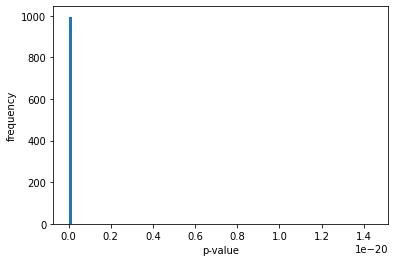

In [ ]:
# generate random adr assuming canceled and non canceled bookings are normally distributed
canceled_data = np.random.normal(adr_canceled.mean(),adr_canceled.std(),[len(adr_canceled), numReps])
non_canceled_data = np.random.normal(adr_non_canceled.mean(),adr_non_canceled.std(),[len(adr_non_canceled),numReps])

# calculate
t = np.empty([numReps,1])
t[:] = np.NaN
p = np.empty([numReps,1])
p[:] = np.NaN
for ii in range(numReps): # loop through each rep
    t[ii],p[ii] = stats.ttest_ind(canceled_data[:,ii], non_canceled_data[:,ii], equal_var=False)

# Plot the data
plt.hist(p,100)
plt.xlabel('p-value')
plt.ylabel('frequency')

# Calculate the p values that are smaller than alpha
Q = p < alpha

print('With alpha =',alpha, "， power=", sum(Q)[0]/len(Q))

Text(0.5, 0, 'adr of Non Canceled Bookings')

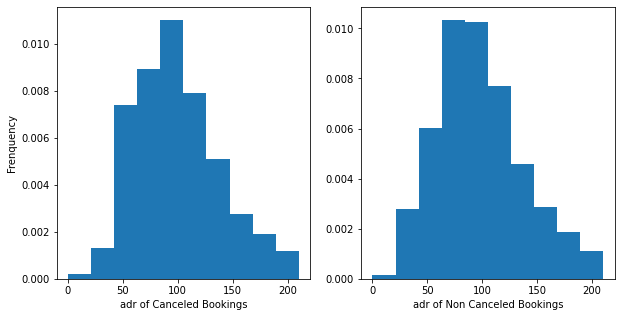

In [ ]:
# Plot the distribution of canceled/non-canceled adrs
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(adr_canceled, density = True)
plt.xlabel('adr of Canceled Bookings')
plt.ylabel('Frenquency')
plt.subplot(1,2,2)
plt.hist(adr_non_canceled, density = True)
plt.xlabel('adr of Non Canceled Bookings')

In [ ]:
# Calculate the SEM
def getSem(array):
  std = np.std(array)
  n = len(array)
  return std/np.sqrt(n)

Difference of mean = 2.886


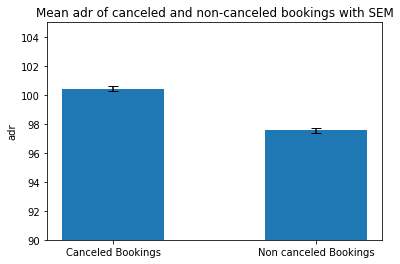

In [ ]:
xPos = np.array([1,2])
means = [np.mean(adr_canceled), np.mean(adr_non_canceled)]
sems = [getSem(adr_canceled), getSem(adr_non_canceled)]

# Plot the mean and SEM of canceled/not canceled adrs
plt.bar(xPos, means,width=0.5, yerr=sems, capsize=5)
plt.xticks(xPos, ['Canceled Bookings', 'Non canceled Bookings'])
plt.ylabel('adr')
plt.title('Mean adr of canceled and non-canceled bookings with SEM')
plt.ylim(90, 105)
print('Difference of mean = {:.3f}'.format(np.mean(adr_canceled) - np.mean(adr_non_canceled)))

In [ ]:
# Calculate degree of freedom of Welch's t-test
def welch_dof(x, y):
  dof = (x.var()/x.size + y.var()/y.size)**2 /((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
  return dof

In [ ]:
t,p = stats.ttest_ind(adr_canceled, adr_non_canceled, equal_var=False)
dof = welch_dof(adr_canceled, adr_non_canceled)
print('The t value of adr between canceled and not canceled booking is: {:.3f}, with p ={}, df={:.3f}'.format(t, p, dof))
print('There is a significant difference of adr between canceled and not canceled bookings')

The t value of adr between canceled and not canceled booking is: 12.287, with p =1.1311766856226542e-34, df=92642.088
There is a significant difference of adr between canceled and not canceled bookings


In [ ]:
# Calculate Cohen's d
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

In [ ]:
d = cohen_d(adr_canceled, adr_non_canceled)
print("The cohen's d of canceled/non canceled bookings adr = {:.4f}, indicating a small effect size".format(d))

The cohen's d of canceled/non canceled bookings adr = 0.0745, indicating a small effect size


In [ ]:
resort_booking = encoded_booking.loc[encoded_booking['hotel'] == 1]
city_booking = encoded_booking.loc[encoded_booking['hotel'] == 0]
print('Number of resort hotel booking:', resort_booking.shape[0])
print('Number of city hotel booking:', city_booking.shape[0])

Number of resort hotel booking: 36732
Number of city hotel booking: 76772


In [ ]:
resort_canceled = resort_booking.loc[resort_booking['is_canceled'] == 1]
resort_non_canceled = resort_booking.loc[resort_booking['is_canceled'] == 0]

Difference of mean = 8.701


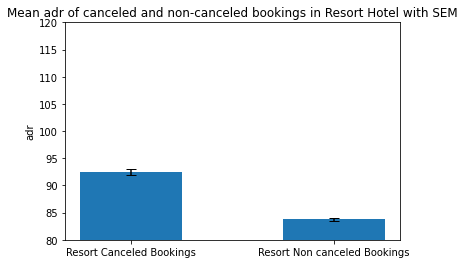

In [ ]:
means = [np.mean(resort_canceled['adr']), np.mean(resort_non_canceled['adr'])]
sems = [getSem(resort_canceled['adr']), getSem(resort_non_canceled['adr'])]

plt.bar(xPos, means,width=0.5, yerr=sems, capsize=5)
plt.xticks(xPos, ['Resort Canceled Bookings', 'Resort Non canceled Bookings'])
plt.ylabel('adr')
plt.title('Mean adr of canceled and non-canceled bookings in Resort Hotel with SEM')
plt.ylim(80,120)
print('Difference of mean = {:.3f}'.format(np.mean(resort_canceled['adr']) - np.mean(resort_non_canceled['adr'])))

In [ ]:
t_resort, p_resort = stats.ttest_ind(resort_canceled['adr'], resort_non_canceled['adr'], equal_var=False)
dof_resort = welch_dof(resort_canceled['adr'], resort_non_canceled['adr'])
print('The t value of adr between canceled and not canceled booking of resort hotel is: {:.3f}, with p={}, df={:.3f}'.format(t_resort, p_resort, dof_resort))

The t value of adr between canceled and not canceled booking of resort hotel is: 15.661, with p=6.758878966978952e-55, df=16885.586


In [ ]:
city_canceled = city_booking.loc[city_booking['is_canceled'] == 1]
city_non_canceled = city_booking.loc[city_booking['is_canceled'] == 0]

Difference of mean = -2.961


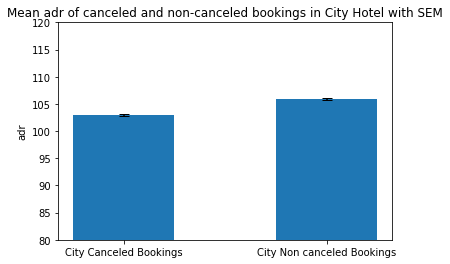

In [ ]:
means = [np.mean(city_canceled['adr']), np.mean(city_non_canceled['adr'])]
sems = [getSem(city_canceled['adr']), getSem(city_non_canceled['adr'])]

plt.bar(xPos, means,width=0.5, yerr=sems, capsize=5)
plt.xticks(xPos, ['City Canceled Bookings', 'City Non canceled Bookings'])
plt.ylabel('adr')
plt.title('Mean adr of canceled and non-canceled bookings in City Hotel with SEM')
plt.ylim(80,120)
print('Difference of mean = {:.3f}'.format(np.mean(city_canceled['adr']) - np.mean(city_non_canceled['adr'])))

In [ ]:
t_city, p_city = stats.ttest_ind(city_canceled['adr'], city_non_canceled['adr'], equal_var=False)
dof_city = welch_dof(city_canceled['adr'], city_non_canceled['adr'])
print('The t value of adr between canceled and not canceled booking of city hotel is: {:.3f}, with p={}, df={:.3f}'.format(t_city, p_city, dof_city))

The t value of adr between canceled and not canceled booking of city hotel is: -12.228, with p=2.385668270018843e-34, df=69700.224


#Extra Credit: Inference Questions: Is the lead time for users who canceled their reservations significantly longer than those for users who did not?


In [ ]:
import matplotlib.pyplot as plt
lt_cancel = booking[(booking['is_canceled']==1)]['lead_time']
lt_notcancel = booking[(booking['is_canceled']==0)]['lead_time']
display(lt_cancel, lt_notcancel)

8         85
9         75
10        23
27        60
32        96
          ..
108829    25
111355     4
111924     7
111925     6
117295     0
Name: lead_time, Length: 42501, dtype: int64

2           7
3          13
4          14
5          14
6           0
         ... 
119384     21
119385     23
119387     34
119388    109
119389    205
Name: lead_time, Length: 71003, dtype: int64

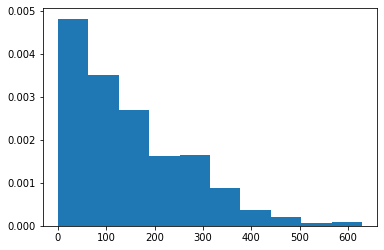

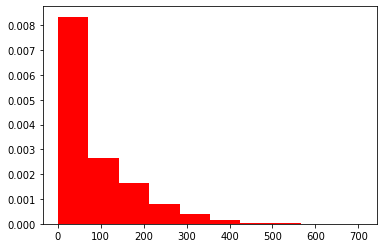

In [ ]:
#check the distribution of two samples
plt.hist(lt_cancel, density=True)
plt.show()
plt.hist(lt_notcancel, density=True, color='r')
plt.show()

In [ ]:
#check the mean, max and min values of two samples
print('mean:',np.mean(lt_cancel),np.mean(lt_notcancel))
print('max value:', np.max(lt_cancel), np.max(lt_notcancel))
print('min value:', np.min(lt_cancel), np.min(lt_notcancel))

mean: 147.15773746500082 81.68053462529753
max value: 629 709
min value: 0 0


In [ ]:
from scipy.stats import mannwhitneyu
#size of number of cancellation users
n1 = len(lt_cancel.index)
#size of number of non-cancellation users
n2 = len(lt_notcancel.index)
#range of possible U values (from 0 to maximum)
maximum = n1*n2

U1, p = mannwhitneyu(lt_cancel.tolist(), lt_notcancel.tolist(), alternative ='greater')
U1, maximum,n1,n2

(2078110730.5, 3017698503, 42501, 71003)

In [ ]:
#the proportion of cases in which a value from one sample exceeds a value from the other(effect size)
#effect size for the Mann–Whitney test report the degree to which one group has data with higher ranks than the other group
r = round(U1/maximum,3)
r

0.689

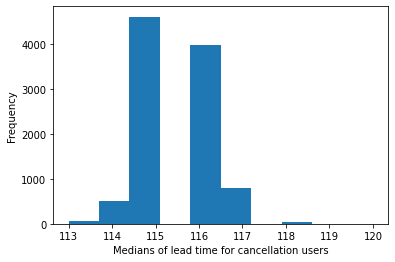


95.0% confidence interval is between 114.0 and 117.0


In [ ]:
#use bootstrap method to visualize 95% confidence interval
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# load dataset
x = lt_cancel

# configure bootstrap
n_iterations = 10000
n_size = int(len(x))

# run bootstrap
medians = list()
for i in range(n_iterations):
   s = resample(x, n_samples=n_size);
   m = np.median(s);
   medians.append(m)

# plot scores
plt.hist(medians)
plt.ylabel('Frequency')
plt.xlabel('Medians of lead time for cancellation users')
plt.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(medians, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(medians, p)

print(f"\n{alpha*100}% confidence interval is between {lower} and {upper}")

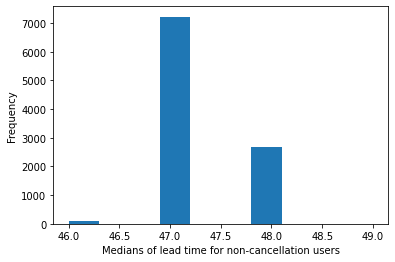


95.0% confidence interval is between 47.0 and 48.0


In [ ]:
# load dataset
x = lt_notcancel

# configure bootstrap
n_iterations = 10000
n_size = int(len(x))

# run bootstrap
medians = list()
for i in range(n_iterations):
   s = resample(x, n_samples=n_size);
   m = np.median(s);
   medians.append(m)

# plot scores
plt.hist(medians)
plt.ylabel('Frequency')
plt.xlabel('Medians of lead time for non-cancellation users')
plt.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(medians, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(medians, p)

print(f"\n{alpha*100}% confidence interval is between {lower} and {upper}")

# Prediction Question
Does total number of people predict total number of nights, while controlling for other explanatory variables?

## Data Preprocessing for Regression

In [ ]:
# remove country, agent, reservation_status_date -- not related and have too many categories
booking_reg.drop(['country', 'agent', 'reservation_status_date'], axis=1, inplace=True)

In [ ]:
# numeric data
booking_reg.select_dtypes(include=['int64', 'float64']).head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights,total_people
2,1,0,7,2015,7,27,1,0,1,1,...,0,0,0,0,0,75.0,0,0,1,1
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,0,75.0,0,0,1,1
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,0,98.0,0,1,2,2
5,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,0,98.0,0,1,2,2
6,1,0,0,2015,7,27,1,0,2,2,...,0,0,0,0,0,107.0,0,0,2,2


In [ ]:
booking_reg.select_dtypes(include=['int64', 'float64']).columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights', 'total_people'],
      dtype='object')

In [ ]:
booking_reg.drop(['arrival_date_year',
                  'arrival_date_month',
                  'arrival_date_week_number',
                  'arrival_date_day_of_month',
                  'stays_in_weekend_nights',
                  'stays_in_week_nights'],
                  axis=1, inplace=True)

In [ ]:
numeric_cols = ['lead_time',
                'adults',
                'previous_cancellations',
                'previous_bookings_not_canceled',
                'booking_changes',
                'days_in_waiting_list',
                'adr',
                'total_nights',
                'total_people']

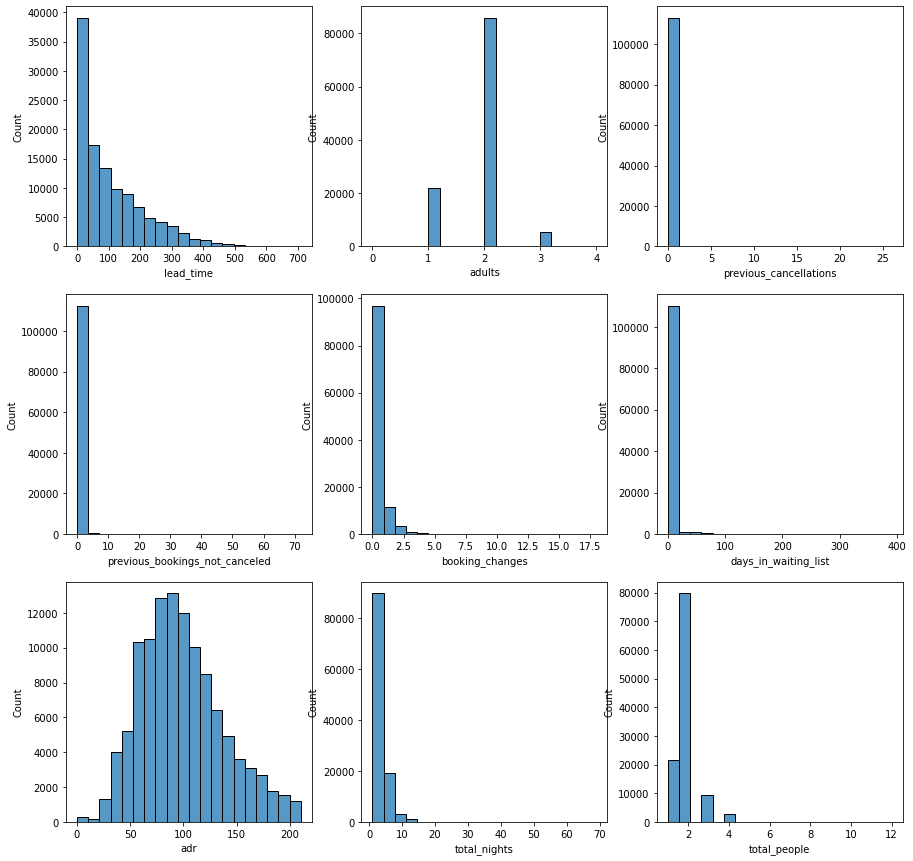

In [ ]:
# plot all histograms
fig = plt.figure(figsize=(15, 15))
count = 1
for col in numeric_cols:
    plt.subplot(3, 3, count)
    sns.histplot(x=col, data=booking_reg, bins=20)
    count += 1

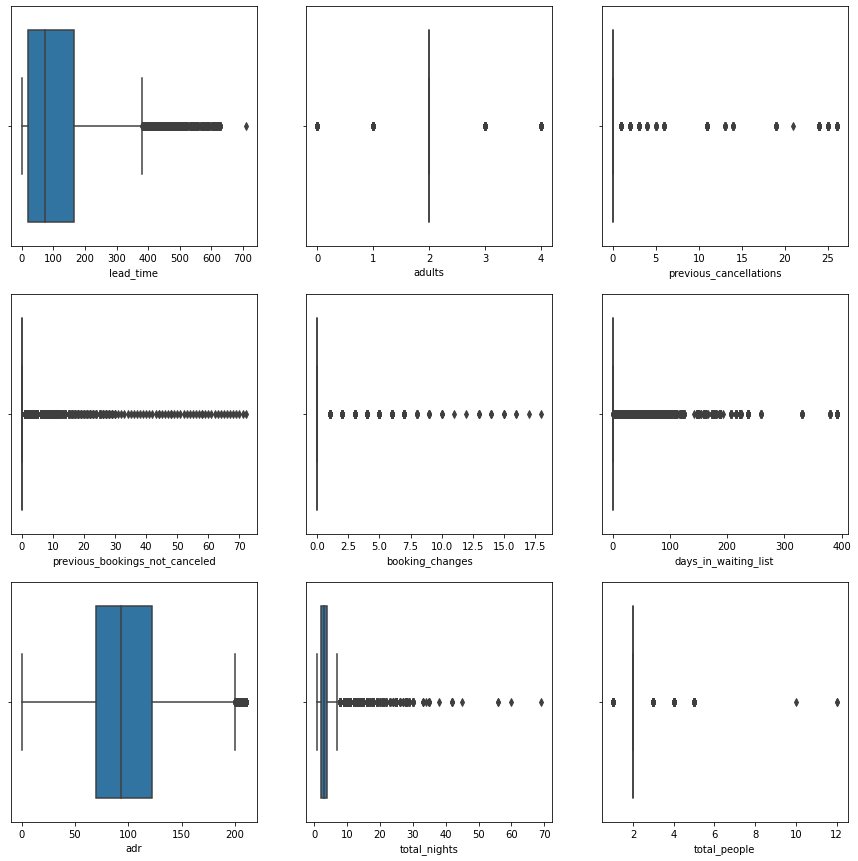

In [ ]:
# plot all box plots
fig = plt.figure(figsize=(15, 15))
count = 1
for col in numeric_cols:
    plt.subplot(3, 3, count)
    sns.boxplot(x=col, data=booking_reg)
    count += 1

In [ ]:
skewed_cols = []
for col in numeric_cols:
    if abs(booking_reg[col].skew()) >= 1:
        skewed_cols.append(col)
    print('skewness of', col)
    print(round(booking_reg[col].skew(), 2))

skewness of lead_time
1.32
skewness of adults
-0.49
skewness of previous_cancellations
24.06
skewness of previous_bookings_not_canceled
25.02
skewness of booking_changes
5.48
skewness of days_in_waiting_list
11.74
skewness of adr
0.55
skewness of total_nights
3.24
skewness of total_people
0.79


In [ ]:
# log transformation
for col in skewed_cols:
    booking_reg[col] = np.log1p(booking_reg[col])

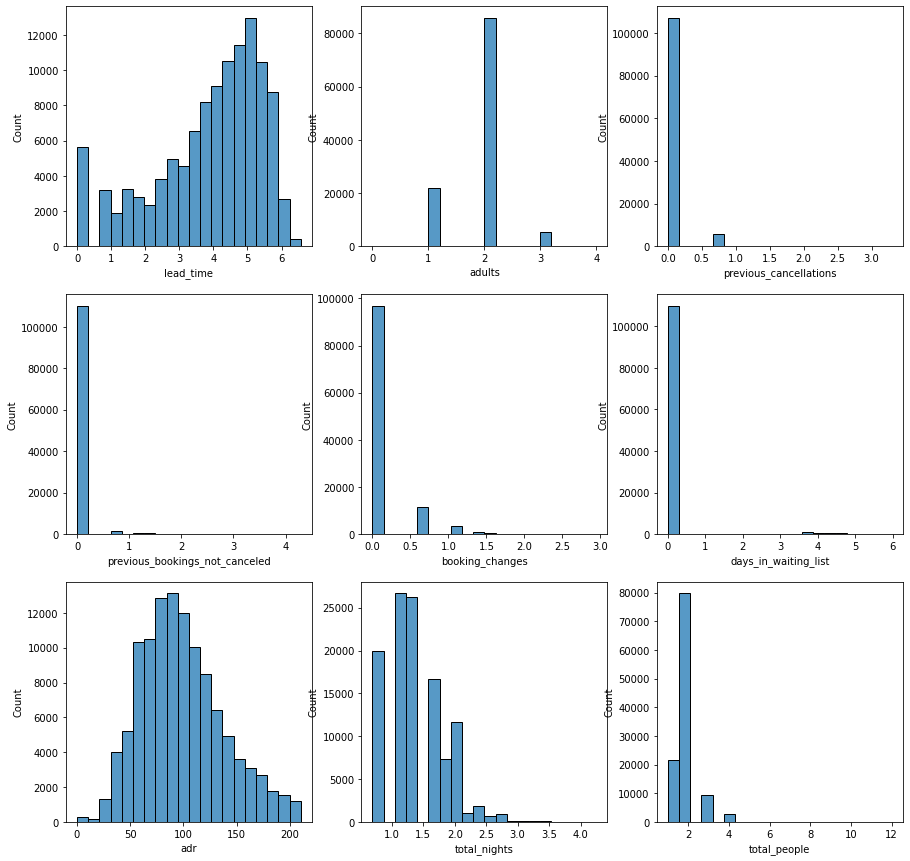

In [ ]:
fig = plt.figure(figsize=(15, 15))
count = 1
for col in numeric_cols:
    plt.subplot(3, 3, count)
    sns.histplot(x=col, data=booking_reg, bins=20)
    count += 1

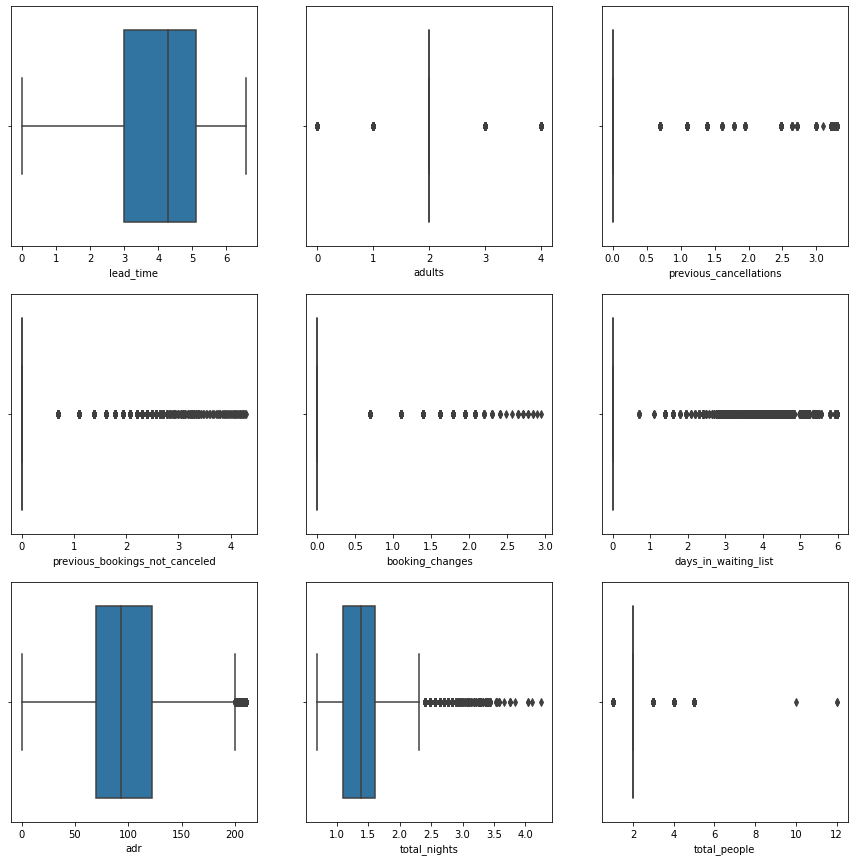

In [ ]:
fig = plt.figure(figsize=(15, 15))
count = 1
for col in numeric_cols:
    plt.subplot(3, 3, count)
    sns.boxplot(x=col, data=booking_reg)
    count += 1

In [ ]:
# one hot encoding
cat_cols = booking_reg.select_dtypes(include='object').columns.tolist()
encoded_booking_reg = pd.get_dummies(booking_reg, columns=cat_cols, drop_first=True)
encoded_booking_reg.head()

,hotel,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
2,1,0,2.079442,1,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,2.639057,1,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,2.708050,2,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
5,1,0,2.708050,2,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
6,1,0,0.000000,2,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
# There is multicollinearity, so we need to remove one feature in each pairs and one-hot encode the dataset again.
corr = round(encoded_booking_reg.corr(), 4)

for i in range(corr.shape[0]):
    for j in range(i):
        feature_1 = corr.index[i]
        feature_2 = corr.columns[j]
        if feature_1 != feature_2 and abs(corr.iloc[i, j]) >= 0.7:
            print(corr.iloc[i, j], feature_1, feature_2)

0.7998 total_people adults
0.908 distribution_channel_Direct market_segment_Direct
-0.7176 distribution_channel_TA/TO market_segment_Direct
-0.7844 distribution_channel_TA/TO distribution_channel_Direct
0.7621 assigned_room_type_D reserved_room_type_D
0.8143 assigned_room_type_E reserved_room_type_E
0.7924 assigned_room_type_F reserved_room_type_F
0.8492 assigned_room_type_G reserved_room_type_G
0.8621 assigned_room_type_H reserved_room_type_H
-0.8939 customer_type_Transient-Party customer_type_Transient
-1.0 reservation_status_Check-Out is_canceled


In [ ]:
booking_reg.drop(['adults',
                  'children',
                  'babies',
                  'distribution_channel',
                  'reserved_room_type',
                  'reservation_status'], axis=1, inplace=True)

In [ ]:
booking_reg['customer_type'] = booking_reg['customer_type'].replace('Transient-Party', 'Transient')

In [ ]:
cat_cols = booking_reg.select_dtypes(include='object').columns.tolist()

In [ ]:
encoded_booking_reg = pd.get_dummies(booking_reg, columns=cat_cols, drop_first=True)

In [ ]:
encoded_booking_reg.head()

,hotel,is_canceled,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient
2,1,0,2.079442,0,0.0,0.0,0.0,0.0,75.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,2.639057,0,0.0,0.0,0.0,0.0,75.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,2.708050,0,0.0,0.0,0.0,0.0,98.0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,2.708050,0,0.0,0.0,0.0,0.0,98.0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0.000000,0,0.0,0.0,0.0,0.0,107.0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# check correlation again
corr = round(encoded_booking_reg.corr(), 2)

for i in range(corr.shape[0]):
    for j in range(i):
        left = corr.index[i]
        right = corr.columns[j]
        if left != right and abs(corr.iloc[i, j]) >= 0.7:
            print(corr.iloc[i, j], left, right)

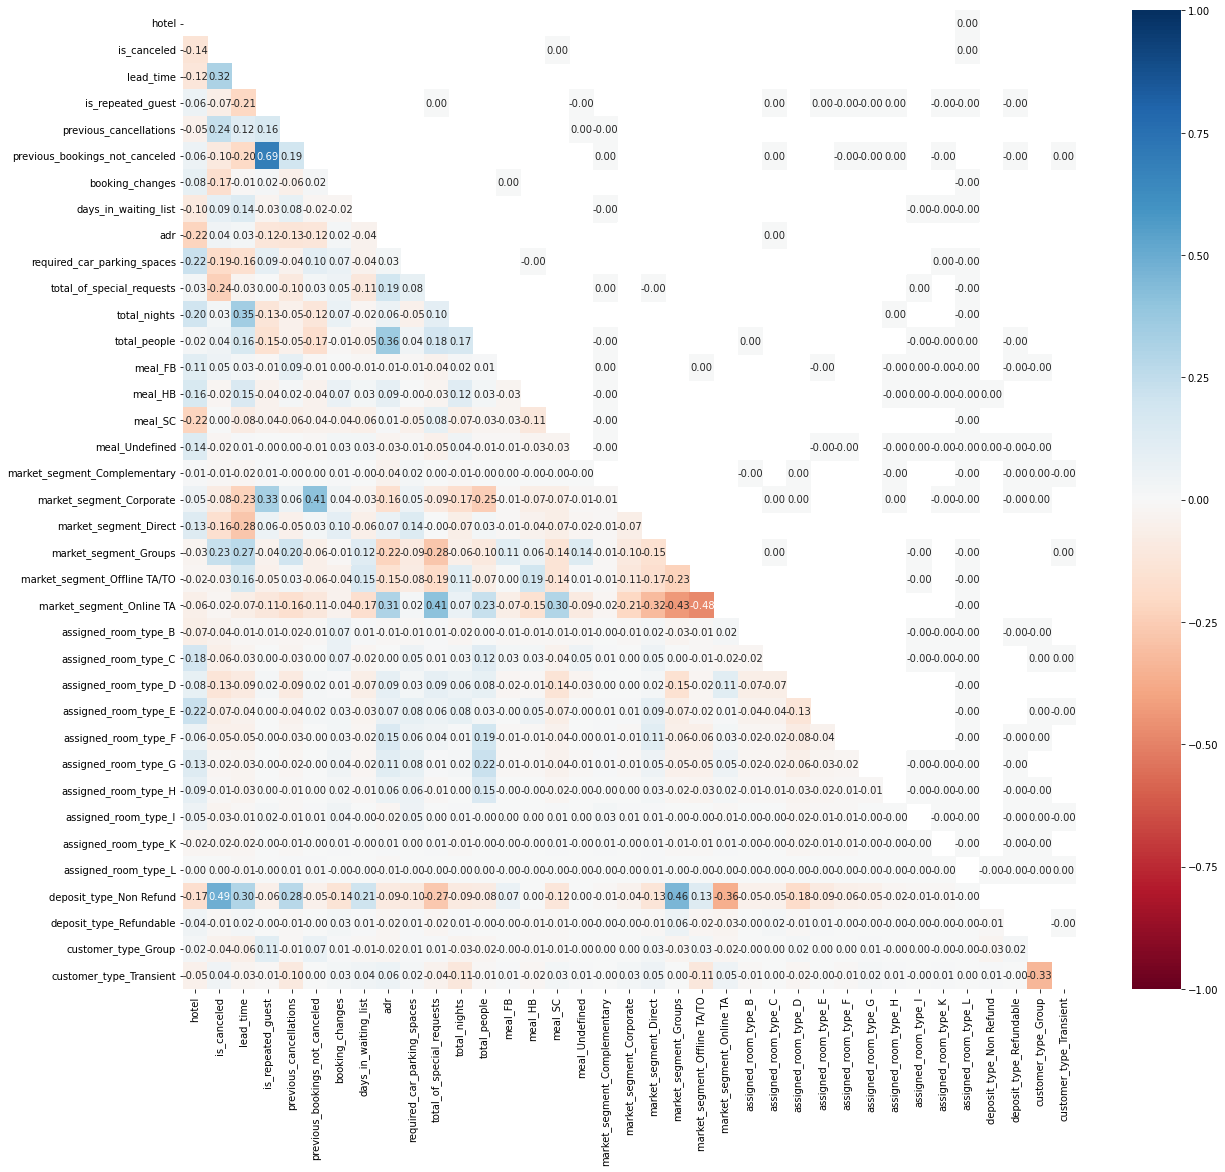

In [ ]:
fig = plt.figure(figsize=(20, 18))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdBu', fmt='.2f', annot=True, mask=np.triu(corr));

In [ ]:
# remove previous_bookings_not_canceled because it is highly correlated with is_repeated_guests
encoded_booking_reg.drop('previous_bookings_not_canceled', axis=1, inplace=True)

In [ ]:
booking_reg.shape

(113504, 18)

## Multiple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
y = encoded_booking_reg['total_nights']
X = encoded_booking_reg.loc[:, ~encoded_booking_reg.columns.isin(['total_nights'])]

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=10636408)

In [ ]:
X_tr_2 = sm.add_constant(X_tr)
model = sm.OLS(y_tr, X_tr_2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_nights   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     903.1
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:37:16   Log-Likelihood:                -46195.
No. Observations:               90803   AIC:                         9.246e+04
Df Residuals:                   90767   BIC:                         9.280e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
results.pvalues['total_people']

5.296503084099264e-63

In [ ]:
results.params.sort_values()

market_segment_Corporate       -0.475337
market_segment_Groups          -0.443743
market_segment_Complementary   -0.402726
market_segment_Direct          -0.358598
market_segment_Online TA       -0.326560
assigned_room_type_L           -0.311629
market_segment_Offline TA/TO   -0.294168
customer_type_Group            -0.291686
customer_type_Transient        -0.230394
deposit_type_Non Refund        -0.165433
assigned_room_type_H           -0.156319
required_car_parking_spaces    -0.094315
is_repeated_guest              -0.074317
previous_cancellations         -0.071808
assigned_room_type_K           -0.059853
assigned_room_type_C           -0.057641
assigned_room_type_G           -0.047724
assigned_room_type_F           -0.042963
assigned_room_type_B           -0.038936
meal_SC                        -0.030469
deposit_type_Refundable        -0.025070
assigned_room_type_I           -0.011678
days_in_waiting_list           -0.010178
adr                             0.000428
meal_FB         

In [ ]:
y_tr_hat = results.predict(X_tr_2)
X_te_2 = sm.add_constant(X_te)
y_te_hat = results.predict(X_te_2)

In [ ]:
r2_score(y_tr, y_tr_hat) # training R2

0.2582974193496035

In [ ]:
r2_score(y_te, y_te_hat) # testing R2

0.2550026040121718

In [ ]:
np.sqrt(mean_squared_error(y_tr, y_tr_hat)) # training RMSE

0.40244212681514085

In [ ]:
np.sqrt(mean_squared_error(y_te, y_te_hat)) # testing RMSE

0.4103435527903431

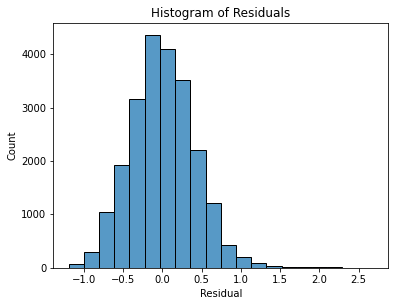

In [ ]:
residual = y_te - y_te_hat

fig = plt.figure(figsize=(6, 4.5))
sns.histplot(residual, bins=20);
plt.title("Histogram of Residuals");
plt.xlabel("Residual");

# Classification: Build a model to predict booking cancellation. Does the choice of model perform differently if we narrow down the data to certain clusters?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# dataset to be used for clustering and classification
classi = booking.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month',
                       'meal', 'country', 'market_segment', 'distribution_channel', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr', 'assigned_room_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'], axis = 1)
classi

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,total_nights,total_people
2,1,0,7,0,1,1,0,0,0,0,0,A,No Deposit,1,1
3,1,0,13,0,1,1,0,0,0,0,0,A,No Deposit,1,1
4,1,0,14,0,2,2,0,0,0,0,0,A,No Deposit,2,2
5,1,0,14,0,2,2,0,0,0,0,0,A,No Deposit,2,2
6,1,0,0,0,2,2,0,0,0,0,0,C,No Deposit,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,0,21,2,5,2,0,0,0,0,0,A,No Deposit,7,2
119385,0,0,23,2,5,2,0,0,0,0,0,A,No Deposit,7,2
119387,0,0,34,2,5,2,0,0,0,0,0,D,No Deposit,7,2
119388,0,0,109,2,5,2,0,0,0,0,0,A,No Deposit,7,2


Columns used for clustering and classification:

In [ ]:
classi.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'deposit_type',
       'total_nights', 'total_people'],
      dtype='object')

In [ ]:
# one-hot encode the dataset
en_classi = pd.get_dummies(classi, columns = ['reserved_room_type', 'deposit_type'])

# normalize each column to 0 to 1
for col in en_classi.columns:
    if col != 'is_canceled':
        scaler = MinMaxScaler()
        en_classi[col] = scaler.fit_transform(en_classi[col].values.reshape(-1, 1))

# choose 5 as the number of clusters
features_cols = en_classi.drop('is_canceled', axis = 1)
kmeans = KMeans(n_clusters=5, random_state=10636408).fit(features_cols)
clusters = kmeans.predict(features_cols)
# add assigned clusters to dataframe
en_classi['cluster'] = clusters

# train test split
classi_x = en_classi.drop('is_canceled', axis = 1)
classi_y = en_classi['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(classi_x, classi_y, train_size = 0.7, random_state = 10636408)

In [ ]:
# overall random forest classification (containing all data & clusters)
rf0 = RandomForestClassifier(n_estimators = 200, random_state = 10636408)
rf0.fit(x_train, y_train)

rf_y_pred0 = rf0.predict(x_test)
rf_y_proba0 = rf0.predict_proba(x_test)[:,1]

Random Forest Accuracy:  0.7733760131563491
Random Forest AUC:  0.8120571339370031


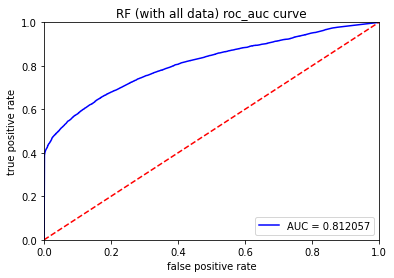

In [ ]:
acc0 = accuracy_score(y_test, rf_y_pred0)
auc0 = roc_auc_score(y_test, rf_y_proba0)
print('Random Forest Accuracy: ', acc0)
print("Random Forest AUC: ", auc0)

fpr, tpr, thrsh = roc_curve(y_test, rf_y_proba0)
plt.plot(fpr, tpr, 'b', label = 'AUC = %.6f' % auc0)
plt.title('RF (with all data) roc_auc curve')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("false positive rate")
plt.ylabel('true positive rate')
plt.show()

In [ ]:
imp = pd.DataFrame(x_test.columns, columns = ['feature'])
imp['importance'] = rf0.feature_importances_
imp

,feature,importance
0,hotel,0.011060
1,lead_time,0.500399
2,stays_in_weekend_nights,0.016604
3,stays_in_week_nights,0.026674
4,adults,0.007948
5,children,0.005966
6,babies,0.001368
7,is_repeated_guest,0.003700
8,previous_cancellations,0.060812
9,previous_bookings_not_canceled,0.010103


In [ ]:
def clustered_rf(cluster_n):

    # train of current cluster
    clx_train = x_train[x_train['cluster'] == cluster_n]
    train_idx = clx_train.index
    cly_train = y_train.loc[train_idx,]

    # test of current cluster
    clx_test = x_test[x_test['cluster'] == cluster_n]
    test_idx = clx_test.index
    cly_test = y_test.loc[test_idx, ]

    rf = RandomForestClassifier(n_estimators = 200, random_state = 10636408).fit(clx_train, cly_train)
    rf_y_pred = rf.predict(clx_test)
    rf_y_proba = rf.predict_proba(clx_test)[:,1]

    feacture_importance = rf.feature_importances_
    acc = accuracy_score(cly_test, rf_y_pred)
    auc = roc_auc_score(cly_test, rf_y_proba)
    print('Cluster ' + str(cluster_n) + ' Random Forest Accuracy: ', acc)
    print('Cluster ' + str(cluster_n) + " Random Forest AUC: ", auc)

    fpr, tpr, thrsh = roc_curve(cly_test, rf_y_proba)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %.6f' % auc)
    plt.title('Cluster ' + str(cluster_n) + ' roc_auc curve')
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("false positive rate")
    plt.ylabel('true positive rate')
    plt.show()

    return acc, auc, feacture_importance

Cluster 0 Random Forest Accuracy:  0.7487657707076248
Cluster 0 Random Forest AUC:  0.7272059175257916


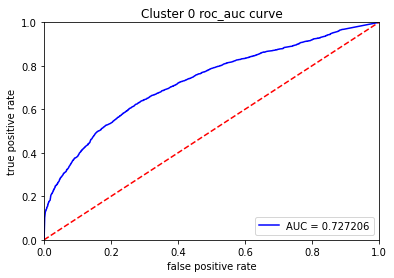

Cluster 1 Random Forest Accuracy:  0.677555514773353
Cluster 1 Random Forest AUC:  0.6571742407359259


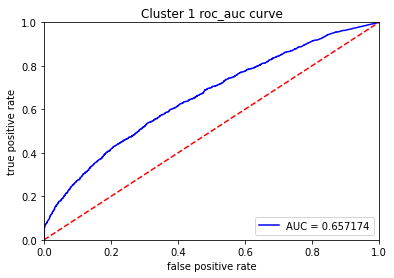

Cluster 2 Random Forest Accuracy:  0.7872068910512043
Cluster 2 Random Forest AUC:  0.7385029186103856


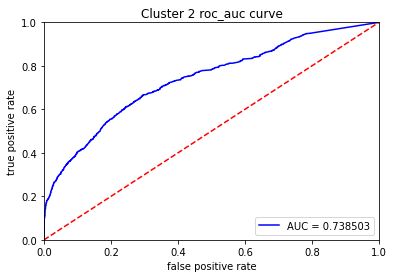

Cluster 3 Random Forest Accuracy:  0.9988500459981601
Cluster 3 Random Forest AUC:  0.98182457010582


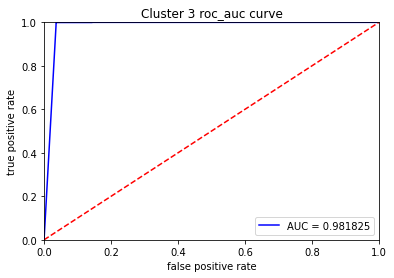

Cluster 4 Random Forest Accuracy:  0.7210464432686655
Cluster 4 Random Forest AUC:  0.7110596098324452


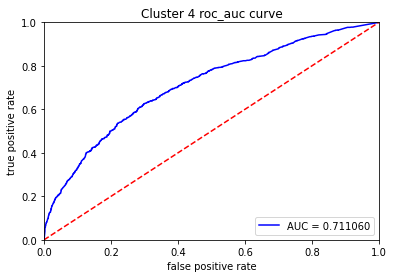

In [ ]:
accuracy = []
auc = []
feature_importance = []

for i in range(5):
    acc, iauc, fi = clustered_rf(i)
    accuracy.append(acc)
    auc.append(iauc)
    feature_importance.append(fi)

In [ ]:
stats = pd.DataFrame([0, 1, 2, 3, 4], columns = ['cluster'])
stats['accuracy'] = accuracy
stats['AUC'] = auc
stats

,cluster,accuracy,AUC
0,0,0.748766,0.727206
1,1,0.677556,0.657174
2,2,0.787207,0.738503
3,3,0.998850,0.981825
4,4,0.721046,0.711060


In [ ]:
# feature importance table
impt_df = pd.DataFrame(x_test.columns, columns = ['feacture'])
impt_df['overall RF importance'] = rf0.feature_importances_
for i in range(5):
  col_name = 'Cluster ' + str(i) + ' importance'
  impt_df[col_name] = feature_importance[i]
impt_df

,feacture,overall RF importance,Cluster 0 importance,Cluster 1 importance,Cluster 2 importance,Cluster 3 importance,Cluster 4 importance
0,hotel,0.011060,0.000000,0.016151,0.000000,1.032643e-01,0.017921
1,lead_time,0.500399,0.752035,0.800441,0.765914,5.071738e-01,0.635289
2,stays_in_weekend_nights,0.016604,0.017784,0.022468,0.025217,8.927895e-02,0.038328
3,stays_in_week_nights,0.026674,0.029143,0.036104,0.040495,6.622537e-02,0.061682
4,adults,0.007948,0.011678,0.011840,0.012305,1.931195e-02,0.018293
5,children,0.005966,0.004946,0.004433,0.003836,8.762302e-03,0.028406
6,babies,0.001368,0.001005,0.001555,0.002015,0.000000e+00,0.004529
7,is_repeated_guest,0.003700,0.008794,0.003178,0.005682,6.353448e-03,0.003402
8,previous_cancellations,0.060812,0.117455,0.022784,0.063546,2.347344e-02,0.027366
9,previous_bookings_not_canceled,0.010103,0.014856,0.005793,0.017716,2.621013e-02,0.007389


**We can see that Cluster 3 has the highest accuracy and AUC value, so the RF model does the best in classifying this group of bookings. Observe Cluster 3.**

In [ ]:
classi['cluster'] = clusters
c3 = classi[classi['cluster'] == 3]
c3.describe()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,total_nights,total_people,cluster
count,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.0,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.0
mean,0.103679,0.993647,213.905886,0.607554,2.068491,1.811911,0.000489,0.0,0.004329,0.417301,0.010682,2.676046,1.812400,3.0
std,0.304855,0.079457,134.038158,0.808464,1.113256,0.393645,0.027709,0.0,0.065653,2.009904,0.447289,1.418277,0.395029,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,3.0
25%,0.000000,1.000000,102.000000,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,2.000000,3.0
50%,0.000000,1.000000,186.000000,0.000000,2.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,2.000000,3.0
75%,0.000000,1.000000,305.000000,1.000000,3.000000,2.000000,0.000000,0.0,0.000000,1.000000,0.000000,3.000000,2.000000,3.0
max,1.000000,1.000000,629.000000,7.000000,16.000000,3.000000,2.000000,0.0,1.000000,26.000000,29.000000,23.000000,4.000000,3.0


In [ ]:
for col in c3.columns:
    print(str(col) + ' column value counts: ')
    print(c3[col].value_counts())
    print()

hotel column value counts: 
0    12838
1     1485
Name: hotel, dtype: int64

is_canceled column value counts: 
1    14232
0       91
Name: is_canceled, dtype: int64

lead_time column value counts: 
277    212
92     155
304    154
104    151
68     150
      ... 
216      1
269      1
255      1
248      1
154      1
Name: lead_time, Length: 387, dtype: int64

stays_in_weekend_nights column value counts: 
0    8298
1    3488
2    2478
3      23
4      16
6      15
7       5
Name: stays_in_weekend_nights, dtype: int64

stays_in_week_nights column value counts: 
2     6929
1     3259
3     2702
4      569
0      500
5      305
15      15
6       15
8       12
9        8
16       5
10       4
Name: stays_in_week_nights, dtype: int64

adults column value counts: 
2    11597
1     2710
3       16
Name: adults, dtype: int64

children column value counts: 
0    14318
1        3
2        2
Name: children, dtype: int64

babies column value counts: 
0    14323
Name: babies, dtype: int64

is_repe